In [2]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Plots import *


In [5]:
df = pd.read_csv('../../data/handlebar/Accelerometer_data_combined_segmented.csv') 
# df.drop('Unnamed: 0', axis=1, inplace=True)
df

,curb_scene,start_time,end_time,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,2024-07-24 10:26:02.003,2024-07-24 10:26:02.499,8.805878,8.796295,8.757996,8.781937,8.805878,8.796295,8.781937,...,8.757996,8.757996,8.762772,8.757996,8.762772,8.767563,8.738831,8.757996,8.743622,8.772354
1,0.0,2024-07-24 10:26:02.503,2024-07-24 10:26:02.995,8.767563,8.748413,8.753204,8.767563,8.777145,8.781937,8.748413,...,8.777145,8.767563,8.796295,8.810669,8.781937,8.781937,8.757996,8.801086,8.762772,8.757996
2,0.0,2024-07-24 10:26:03.002,2024-07-24 10:26:03.497,8.767563,8.767563,8.772354,8.757996,8.786728,8.777145,8.781937,...,8.777145,8.753204,8.777145,8.767563,8.762772,8.786728,8.734055,8.786728,8.753204,8.786728
3,0.0,2024-07-24 10:26:03.502,2024-07-24 10:26:03.999,8.748413,8.777145,8.767563,8.757996,8.757996,8.757996,8.767563,...,8.762772,8.767563,8.772354,8.801086,8.796295,8.791504,8.781937,8.796295,8.781937,8.781937
4,0.0,2024-07-24 10:26:04.004,2024-07-24 10:26:04.497,8.753204,8.767563,8.748413,8.767563,8.767563,8.772354,8.772354,...,8.786728,8.762772,8.762772,8.767563,8.743622,8.729263,8.743622,8.777145,8.781937,8.791504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,1.0,2024-07-24 11:07:59.132,2024-07-24 11:07:59.497,-9.054871,-9.054871,-17.180786,-21.806396,-20.963638,-3.620026,-12.349289,...,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798
4423,1.0,2024-07-24 11:08:33.627,2024-07-24 11:08:33.995,-22.697037,-22.697037,-24.578873,-24.578873,-23.151932,-11.784256,6.440399,...,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062
4424,1.0,2024-07-24 11:08:51.500,2024-07-24 11:08:51.932,19.646820,18.617310,15.653290,14.911087,28.629868,33.657684,32.556350,...,15.849609,8.700531,10.860092,10.860092,11.185715,11.616669,11.616669,11.616669,11.616669,11.616669
4425,1.0,2024-07-24 11:09:36.075,2024-07-24 11:09:36.497,13.508087,13.508087,13.177689,17.094604,18.507187,18.507187,20.657180,...,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523


In [6]:
# 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()

curb_scene
0.0    4351
1.0      76
Name: count, dtype: int64

In [ ]:
#spilt data using sklearn, train data with label now to spilt later
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], test_size=0.2, random_state=111)
train_data


,curb_scene,start_time,end_time,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
1406,0.0,2024-07-24 10:45:21.000,2024-07-24 10:45:21.493,8.647858,8.633499,8.662216,8.667007,8.623917,8.643066,8.628708,...,8.671799,8.657440,8.681381,8.643066,8.619125,8.647858,8.652649,8.652649,8.662216,8.652649
2623,0.0,2024-07-24 10:56:01.001,2024-07-24 10:56:01.497,8.647858,8.638275,8.643066,8.638275,8.638275,8.647858,8.628708,...,8.643066,8.623917,8.647858,8.643066,8.628708,8.638275,8.628708,8.652649,8.652649,8.633499
9,0.0,2024-07-24 10:26:06.503,2024-07-24 10:26:06.995,8.796295,8.777145,8.796295,8.786728,8.772354,8.772354,8.767563,...,8.647858,8.762772,8.877701,8.858551,8.686157,8.652649,8.734055,8.820236,8.810669,8.729263
4426,1.0,2024-07-24 11:10:11.003,2024-07-24 11:10:11.379,10.702087,2.834732,2.078171,0.210693,0.804459,0.804459,11.267120,...,-8.078033,-8.078033,-8.078033,-8.078033,-8.078033,-8.078033,-8.078033,-8.078033,-8.078033,-8.078033
3987,0.0,2024-07-24 11:08:09.005,2024-07-24 11:08:09.495,-1.163590,-8.753204,5.789185,16.764206,10.927139,6.009445,3.069367,...,5.564117,7.378937,13.991715,10.251968,10.280701,5.252884,4.544189,12.330139,15.241486,11.755524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,0.0,2024-07-24 11:10:12.007,2024-07-24 11:10:12.496,11.305420,1.934509,4.352661,11.956650,7.345413,6.588837,3.380615,...,4.721359,12.914322,6.737289,9.955093,4.266464,6.392517,6.315903,5.573700,6.933609,12.579132
681,0.0,2024-07-24 10:38:56.507,2024-07-24 10:38:56.996,5.578491,9.629486,10.448303,0.220261,-9.667786,-6.473923,13.268662,...,5.339066,-1.072601,3.797211,18.181564,15.437820,2.638412,-1.024719,4.999100,17.286133,13.412323
4182,0.0,2024-07-24 11:09:55.003,2024-07-24 11:09:55.498,1.944092,6.320694,10.098740,9.380478,7.417236,1.484406,6.876144,...,10.486603,21.830338,20.293259,4.592072,-5.123596,3.600876,14.221558,12.148178,1.819595,6.057327
2004,0.0,2024-07-24 10:50:39.502,2024-07-24 10:50:39.998,10.754761,8.858551,10.453079,6.660675,8.058884,12.899963,14.111420,...,11.415558,12.028473,11.228806,8.705322,12.416336,10.975021,8.571243,8.786728,5.042191,8.767563


In [ ]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 3:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 3:])
test_data_scaled = scaler.transform(test_data.iloc[:, 3:])
print(train_data_scaled.shape)
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[3:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[3:])
# Add the 'curb_scene', 'start_time', and 'end_time' columns back to the scaled DataFrames
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
train_data_scaled_df['start_time'] = train_data['start_time'].values
train_data_scaled_df['end_time'] = train_data['end_time'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
test_data_scaled_df['start_time'] = test_data['start_time'].values
test_data_scaled_df['end_time'] = test_data['end_time'].values

(3541, 100)


In [23]:
train_data_scaled_df

,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,Acc-Z_10,...,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100,curb_scene,start_time,end_time
0,-0.052877,-0.069607,-0.043462,-0.031654,-0.016803,-0.015773,-0.051811,-0.096330,-0.072322,-0.044821,...,-0.066697,-0.089082,-0.062711,-0.040290,-0.045159,-0.075834,-0.090149,0.0,2024-07-24 10:45:21.000,2024-07-24 10:45:21.493
1,-0.052877,-0.068664,-0.046692,-0.036471,-0.014218,-0.014877,-0.051811,-0.093041,-0.072322,-0.055766,...,-0.066697,-0.086964,-0.064821,-0.045363,-0.045159,-0.077890,-0.094319,0.0,2024-07-24 10:56:01.001,2024-07-24 10:56:01.497
2,-0.023738,-0.041230,-0.020847,-0.011580,0.009923,0.008405,-0.026602,-0.069217,-0.054966,-0.036403,...,-0.019000,-0.074268,-0.061656,-0.023043,-0.008540,-0.043923,-0.073470,0.0,2024-07-24 10:26:06.503,2024-07-24 10:26:06.995
3,0.350379,-1.215139,-1.154012,-1.449529,-1.424716,-1.481686,0.427188,0.280784,-0.162870,-0.827717,...,-3.767888,-3.779172,-3.745167,-3.584970,-3.700977,-3.674221,-3.732586,1.0,2024-07-24 11:10:11.003,2024-07-24 11:10:11.379
4,-1.978918,-3.504307,-0.528065,1.326008,0.397898,-0.508292,-1.061100,1.283947,1.758277,1.836653,...,0.289431,0.278128,-0.810165,-0.910737,0.758408,1.338408,0.585377,0.0,2024-07-24 11:08:09.005,2024-07-24 11:08:09.495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,0.468817,-1.392976,-0.770367,0.519922,-0.247001,-0.399939,-1.004593,-0.199849,-0.219463,0.111758,...,0.223718,-1.051025,-0.559258,-0.535370,-0.717940,-0.447405,0.764685,0.0,2024-07-24 11:10:12.007,2024-07-24 11:10:12.496
3537,-0.655411,0.127147,0.257802,-1.447925,-3.310270,-2.842830,0.790564,2.639574,1.204420,-0.840344,...,2.044635,1.417857,-1.385780,-2.090606,-0.843495,1.777914,0.946079,0.0,2024-07-24 10:38:56.507,2024-07-24 10:38:56.996
3538,-1.368863,-0.526496,0.198841,0.087974,-0.234069,-1.354528,-0.369986,-0.549847,0.200081,-0.137423,...,-0.963379,-3.126239,-1.173880,1.139578,0.718648,-1.546684,-0.655177,0.0,2024-07-24 11:09:55.003,2024-07-24 11:09:55.498
3539,0.360719,-0.025149,0.258608,-0.368057,-0.118539,0.780317,0.943565,0.777023,0.022001,-0.060817,...,-0.052917,0.750106,0.449649,-0.057538,-0.015862,-0.853974,-0.065132,0.0,2024-07-24 10:50:39.502,2024-07-24 10:50:39.998


In [26]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].values[:, :-3]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].values[:, :-3]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].values[:, :-3]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].values[:, :-3]
# Debug: Print the shapes to verify the slicing
print("Normal Train Data Shape:", normal_train_data_scaled.shape)
print("Abnormal Train Data Shape:", abnormal_train_data_scaled.shape)
print("Normal Test Data Shape:", normal_test_data_scaled.shape)
print("Abnormal Test Data Shape:", abnormal_test_data_scaled.shape)

Normal Train Data Shape: (3479, 100)
Abnormal Train Data Shape: (62, 100)
Normal Test Data Shape: (872, 100)
Abnormal Test Data Shape: (14, 100)


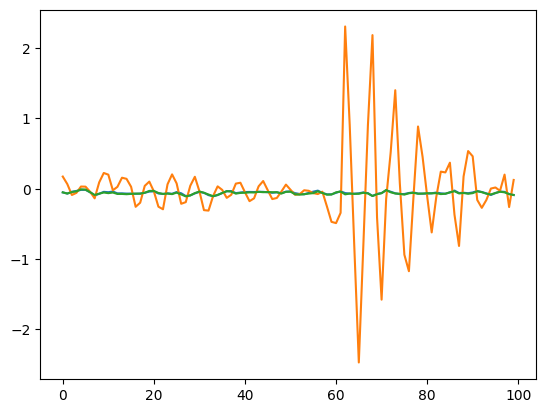

In [56]:
#See normal data ecg
plt.plot(normal_train_data_scaled[0])
plt.plot(normal_train_data_scaled[500])
plt.plot(normal_train_data_scaled[600])

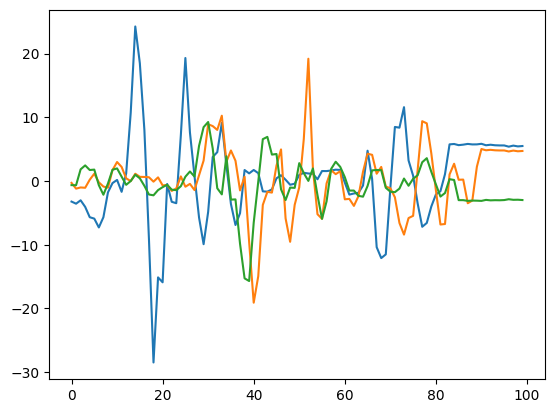

In [49]:
# #see abnormal data
plt.plot(abnormal_train_data_scaled[10])
plt.plot(abnormal_train_data_scaled[20])
plt.plot(abnormal_train_data_scaled[30])


In [57]:
#Allow me to use data in different ways
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(8, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(100, activation='sigmoid')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        #returns me a decoder object
        return decoded

In [58]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')
model.compile(optimizer='adam', loss='mae')

In [12]:
# seprate class as well for normal and abnormal data invalidation data
history = model.fit(normal_train_data_scaled, normal_train_data_scaled,epochs=100, batch_size=128,
                    validation_data=(train_data_scaled, train_data_scaled), 
                    shuffle=True, callbacks=[early_stopping])

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.7099 - val_loss: 0.6268
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5251 - val_loss: 0.5414
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4757 - val_loss: 0.5413
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4830 - val_loss: 0.5413
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4856 - val_loss: 0.5413
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4887 - val_loss: 0.5413
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4798 - val_loss: 0.5412
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4859 - val_loss: 0.5411
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4795 - val_loss: 0.5407
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4788 - val_loss: 0.5400
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4745 - val_loss: 0.5394
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

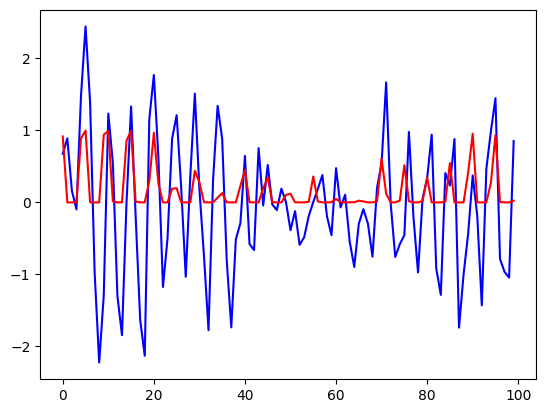

In [13]:
#normal data
#Encoder is bottleneck of 8 Units, decoder is reconstructed output of 100 units
encoder_out = model.encoder(normal_test_data_scaled).numpy()
decoder_out = model.decoder(encoder_out).numpy()
plt.plot(normal_test_data_scaled[0], 'blue')
plt.plot(decoder_out[0], 'red')

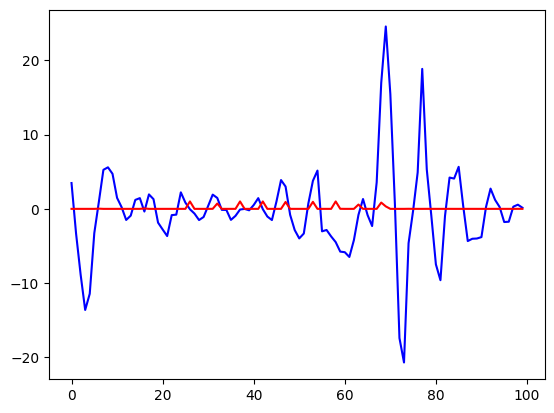

In [14]:
# abnormal data
encoder_out_abnormal = model.encoder(abnormal_test_data_scaled).numpy()
decoder_out_abnormal = model.decoder(encoder_out_abnormal).numpy()
plt.plot(abnormal_test_data_scaled[2], 'blue')
plt.plot(decoder_out_abnormal[2], 'red')

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


(array([ 93., 220.,  15.,   8.,   6.,   1.,   3.,   1.,   4.,  12.,  24.,
         24.,  40.,  35.,  55.,  40.,  37.,  40.,  47.,  46.,  49.,  38.,
         41.,  30.,  29.,  18.,  17.,  19.,  12.,   8.,   7.,   9.,   4.,
          2.,   3.,   2.,   2.,   2.,   0.,   4.,   2.,   5.,   1.,   1.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([0.01776952, 0.04881921, 0.07986889, 0.11091857, 0.14196826,
        0.17301794, 0.20406762, 0.23511731, 0.26616699, 0.29721667,
        0.32826636, 0.35931604, 0.39036572, 0.42141541, 0.45246509,
        0.48351477, 0.51456446, 0.54561414, 0.57666382, 0.60771351,
        0.63876319, 0.66981287, 0.70086256, 0.73191224, 0.76296192,
        0.79401161, 0.82506129, 0.85611097, 0.88716066, 0.91821034,
        0.94926002, 0.98030971, 1.01135939, 1.04240907, 1.07345876,
        1.10450844, 1.13555812, 1.16660781, 1.19765749, 1.22870717,
        1.25975686, 1.29080654, 1.32185622, 1.35290591, 1.38395559,
        1.41500527, 1.44605496, 1.47710464, 1.

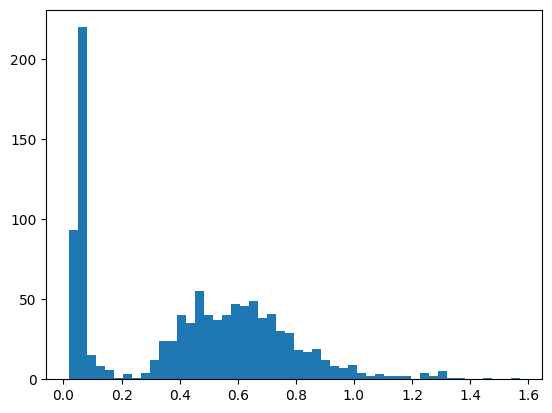

In [15]:
reconstruction = model.predict(normal_test_data_scaled)    #output error between input and output
train_loss = tf.keras.losses.mae(reconstruction, normal_test_data_scaled)
plt.hist(train_loss, bins=50)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


(array([1., 1., 1., 1., 1., 1., 2., 0., 2., 0., 1., 0., 1., 0., 1., 0., 2.,
        2., 3., 2., 2., 2., 1., 1., 3., 1., 1., 0., 0., 0., 1., 3., 0., 2.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1.02821577, 1.11112532, 1.19403487, 1.27694442, 1.35985398,
        1.44276353, 1.52567308, 1.60858264, 1.69149219, 1.77440174,
        1.85731129, 1.94022085, 2.0231304 , 2.10603995, 2.1889495 ,
        2.27185906, 2.35476861, 2.43767816, 2.52058771, 2.60349727,
        2.68640682, 2.76931637, 2.85222592, 2.93513548, 3.01804503,
        3.10095458, 3.18386413, 3.26677369, 3.34968324, 3.43259279,
        3.51550234, 3.5984119 , 3.68132145, 3.764231  , 3.84714055,
        3.93005011, 4.01295966, 4.09586921, 4.17877876, 4.26168832,
        4.34459787, 4.42750742, 4.51041697, 4.59332653, 4.67623608,
        4.75914563, 4.84205518, 4.92496474, 5.00787429, 5.09078384,
        5.17369339]),
 <BarContainer object of 50 artists>)

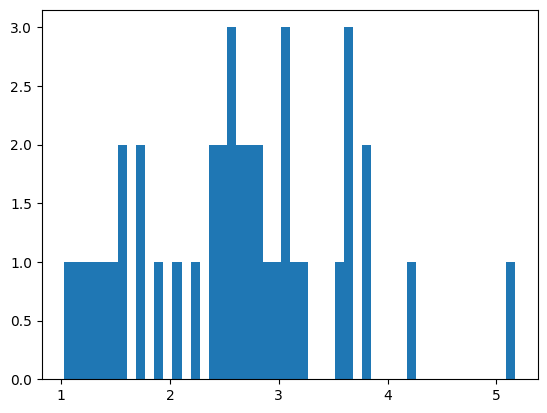

In [23]:
reconstruction_abnormal = model.predict(abnormal_test_data_scaled)
train_loss_abnormal = tf.keras.losses.mae(reconstruction_abnormal, abnormal_test_data_scaled)
plt.hist(train_loss_abnormal, bins=50)

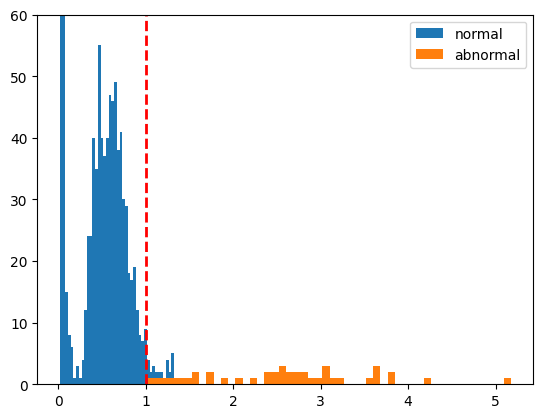

In [24]:
threadshold = 1
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_abnormal, bins=50, label='abnormal')
plt.ylim(0, 60)
plt.legend()
plt.axvline(threadshold, color='r', linestyle='dashed', linewidth=2,label = '{:0.3f}'.format(threadshold))
plt.show()

In [22]:
preds=tf.math.less(train_loss, threadshold)
correct = tf.math.count_nonzero(preds)
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds))

Correct Predictions:  1024
Accuracy:  0.9678638941398866


In [27]:
preds_abnormal=tf.math.greater(train_loss_abnormal, threadshold)
correct = tf.math.count_nonzero(preds_abnormal)
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_abnormal))

Correct Predictions:  41
Accuracy:  1.0
